# 심심해서 해보는 로또 당첨 번호 분석하기
---

- 동행복권 사이트에서 엑셀파일로 데이터 받을 수 있지만, 크롤링하기
- 역시나 오타 조심 
- 들여쓰기 라인 ... 맞추기...
- () [] 생각하기

## 😍 감사합니다 많은 도움 되었습니다 !!

[참고 블로그 1](https://teddylee777.github.io/python/lotto/)<br>
[참고 블로그 2](https://somjang.tistory.com/entry/Python%EB%A1%9C%EB%98%90-api%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%98%EC%97%AC-%EC%97%AD%EB%8C%80-%EB%A1%9C%EB%98%90-%EB%8B%B9%EC%B2%A8-%EA%B2%B0%EA%B3%BC-%EB%B6%84%EC%84%9D%ED%95%B4%EB%B3%B4%EA%B8%B0)

## 라이브러리 임포트 및 데이터 
---

In [1]:
import numpy as np
import pandas as pd
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup
from collections import Counter

In [2]:
# 23. 05. 24일 기준 최신회차 (1068회) 로또번호
count = 1068
url1 = f'https://dhlottery.co.kr/gameResult.do?method=byWin&drwNo={count}'
html = requests.get(url1).text
soup1 = BeautifulSoup(html, 'lxml')
# soup

In [ ]:
# <div class="win_result">
# 					<h4><strong>1068회</strong> 당첨결과</h4>
# 					<p class="desc">(2023년 05월 20일 추첨)</p>
# 					<div class="nums">
# 						<div class="num win">
# 							<strong>당첨번호</strong>
# 							<p>
# 								<span class="ball_645 lrg ball1">4</span>
# 								<span class="ball_645 lrg ball1">7</span>
# 								<span class="ball_645 lrg ball2">19</span>
# 								<span class="ball_645 lrg ball3">26</span>
# 								<span class="ball_645 lrg ball4">33</span>
# 								<span class="ball_645 lrg ball4">35</span>
# 							</p>
# 						</div>
# 						<div class="num bonus">
# 							<strong>보너스</strong>
# 							<p><span class="ball_645 lrg ball1">3</span></p>
# 						</div>
# 					</div>
# 				</div>

## 당첨일자
---

In [ ]:
# <p class="desc">(2023년 05월 20일 추첨)</p>

In [3]:
soup1.find('p', class_="desc")
soup1.find('p', class_="desc").text

'(2023년 05월 20일 추첨)'

In [4]:
soup1.find('p', class_="desc").text[1:14]
# type(soup1.find('p', class_="desc").text[1:14]) # str 확인

'2023년 05월 20일'

In [5]:
date_1 = soup1.find('p', class_="desc").text[1:14]
date_1.format('%Y년 %m월 %d일')

'2023년 05월 20일'

In [6]:
type(date_1.format('%Y년 %m월 %d일'))

str

In [7]:
date = date_1.format('%Y년 %m월 %d일')
date

'2023년 05월 20일'

## 당첨번호
---

In [ ]:
# <div class="num win">
# 							<strong>당첨번호</strong>
# 							<p>
# 								<span class="ball_645 lrg ball1">4</span>
# 								<span class="ball_645 lrg ball1">7</span>
# 								<span class="ball_645 lrg ball2">19</span>
# 								<span class="ball_645 lrg ball3">26</span>
# 								<span class="ball_645 lrg ball4">33</span>
# 								<span class="ball_645 lrg ball4">35</span>
# 							</p>
# 						</div>

In [8]:
soup1.find('div', class_ = 'num win')
soup1.find('div', class_ = 'num win').find('p')

# 문자
soup1.find('div', class_ = 'num win').find('p').text

# 공백기준
soup1.find('div', class_ = 'num win').find('p').text.split()

# 문자열 → 숫자형
[int(i) for i in soup1.find('div', class_ = 'num win').find('p').text.split()]
a = [int(i) for i in soup1.find('div', class_ = 'num win').find('p').text.split()]
a

[4, 7, 19, 26, 33, 35]

In [9]:
print(f'{count}회차 당첨 번호는 {a}입니다.')

1068회차 당첨 번호는 [4, 7, 19, 26, 33, 35]입니다.


## 보너스 번호
---

In [ ]:
# #<div class="num bonus">
# 							<strong>보너스</strong>
# 							<p><span class="ball_645 lrg ball1">3</span></p>
# 						</div>

In [10]:
soup1.find('div', class_ = 'num bonus')
soup1.find('div', class_ = 'num bonus').find('p')
soup1.find('div', class_ = 'num bonus').find('p').text
int(soup1.find('div', class_ = 'num bonus').find('p').text)
b = int(soup1.find('div', class_ = 'num bonus').find('p').text)
print(f'{count}회차 보너스 번호는 {b}입니다.')

1068회차 보너스 번호는 3입니다.


In [ ]:
# 1차로 정리해보면
# 회차의 결과를 보여주는 

In [16]:
def lotto_1(count):
    url=f'https://dhlottery.co.kr/gameResult.do?method=byWin&drwNo={count}'
    html = requests.get(url).text
    soup1 = BeautifulSoup(html, 'lxml')

    # 날짜
    date = date_1.format('%Y년 %m월 %d일')
    # 당첨 번호
    win_num = [int(i) for i in soup1.find('div', class_ = 'num win').find('p').text.split()]
    # 보너스 번호
    b_num = int(soup1.find('div', class_ = 'num bonus').find('p').text)

    return {
        '날짜': date,
        '당첨번호': win_num,
        '보너스번호': b_num
    }

lotto_1(1068)
result = lotto_1(1068)
result

{'날짜': '2023년 05월 20일', '당첨번호': [4, 7, 19, 26, 33, 35], '보너스번호': 3}

In [17]:
result['날짜']

'2023년 05월 20일'

In [18]:
result['당첨번호']
result['당첨번호'][0]

4

In [19]:
# 한회차 데이터 프레임 ㄱㄱ
 
def lotto_1(count):

    url=f'https://dhlottery.co.kr/gameResult.do?method=byWin&drwNo={count}'
    html = requests.get(url).text
    soup1 = BeautifulSoup(html, 'lxml')

    # 날짜
    date = date_1.format('%Y년 %m월 %d일')
    # 당첨 번호
    win_num = [int(i) for i in soup1.find('div', class_ = 'num win').find('p').text.split()]
    # 보너스 번호
    b_num = int(soup1.find('div', class_ = 'num bonus').find('p').text)

    return {
        '날짜': date,
        '당첨번호': win_num,
        '보너스번호': b_num
    }
result = lotto_1(1068)

# 담을 곳
dataf = {
    '날짜' : [],
    'num1' : [],
    'num2' : [],
    'num3' : [],
    'num4' : [],
    'num5' : [],
    'num6' : [],
    'bonus' : [],
    }

dataf['날짜'].append(result['날짜'])
dataf['num1'].append(result['당첨번호'][0])
dataf['num2'].append(result['당첨번호'][1])
dataf['num3'].append(result['당첨번호'][2])
dataf['num4'].append(result['당첨번호'][3])
dataf['num5'].append(result['당첨번호'][4])
dataf['num6'].append(result['당첨번호'][5])
dataf['bonus'].append(result['보너스번호'])

df1 = pd.DataFrame(dataf)
df1

,날짜,num1,num2,num3,num4,num5,num6,bonus
0,2023년 05월 20일,4,7,19,26,33,35,3


In [ ]:
# 이렇게 1회부터 최신회차까지

# 1회 ~ 최신회차 정보 크롤링하기
---

In [ ]:
# <div class="content">
# 				<h3><a id="goByWin1" href="/gameResult.do?method=byWin&amp;wiselog=C_A_1_1"><strong id="lottoDrwNo">1068</strong>회 <span class="txt">당첨결과</span> <span class="date" id="drwNoDate">(2023-05-20 추첨)</span></a></h3>
# 				<p class="num"><a id="numView" href="/gameResult.do?method=byWin&amp;wiselog=C_A_1_1">
# 					<span class="accessibility">당첨번호</span>
# 					<span id="drwtNo1" class="ball_645 ball1">4</span>
# 					<span id="drwtNo2" class="ball_645 ball1">7</span>
# 					<span id="drwtNo3" class="ball_645 ball2">19</span>
# 					<span id="drwtNo4" class="ball_645 ball3">26</span>
# 					<span id="drwtNo5" class="ball_645 ball4">33</span>
# 					<span id="drwtNo6" class="ball_645 ball4">35</span>
# 					<span class="bonus">보너스번호</span>
# 					<span id="bnusNo" class="ball_645 ball1">3</span>
# 				</a></p>
				
# 			</div>

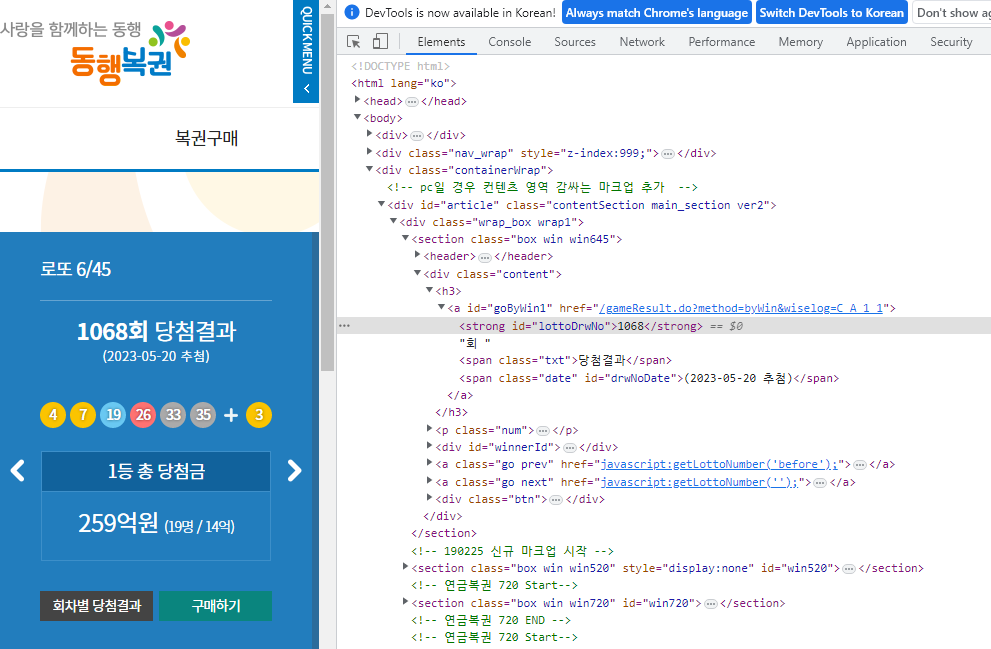

In [22]:
# 최신 회차 매인화면에서 F12로 최신 회차 찾기
url = 'https://dhlottery.co.kr/common.do?method=main'
html = requests.get(url).text
soup = BeautifulSoup(html, 'lxml')

# 최신 회차 출력
soup.find('strong', id='lottoDrwNo')
soup.find('strong', id='lottoDrwNo').text
max_count = int(soup.find('strong', id='lottoDrwNo').text)
max_count

1068

## 최종
---

In [23]:
# 최신회차 
def get_max_count():
    url = 'https://dhlottery.co.kr/common.do?method=main'
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'lxml')
    
    max_count = int(soup.find('strong', id='lottoDrwNo').text)
    return max_count

def lotto(count):
    url=f'https://dhlottery.co.kr/gameResult.do?method=byWin&drwNo={count}'
    html = requests.get(url).text
    soup1 = BeautifulSoup(html, 'lxml')

    # 날짜
    date = date_1.format('%Y년 %m월 %d일')
    # 당첨 번호
    win_num = [int(i) for i in soup1.find('div', class_ = 'num win').find('p').text.split()]
    # 보너스 번호
    b_num = int(soup1.find('div', class_ = 'num bonus').find('p').text)

    return {
        '날짜': date,
        '당첨번호': win_num,
        '보너스번호': b_num
    }

# 최신 회차 가져오기
max_count = get_max_count()

# 전체 회차 크롤링
# 담을 곳
dataf = {
    '날짜' : [],
    'num1' : [],
    'num2' : [],
    'num3' : [],
    'num4' : [],
    'num5' : [],
    'num6' : [],
    'bonus' : [],
    }

for i in tqdm(range(1, max_count+1)):
    result = lotto(i)
    
    dataf['날짜'].append(result['날짜'])
    dataf['num1'].append(result['당첨번호'][0])
    dataf['num2'].append(result['당첨번호'][1])
    dataf['num3'].append(result['당첨번호'][2])
    dataf['num4'].append(result['당첨번호'][3])
    dataf['num5'].append(result['당첨번호'][4])
    dataf['num6'].append(result['당첨번호'][5])
    dataf['bonus'].append(result['보너스번호'])

df1 = pd.DataFrame(dataf)
df1

100%|██████████| 1068/1068 [37:15<00:00,  2.09s/it]


,날짜,num1,num2,num3,num4,num5,num6,bonus
0,2023년 05월 20일,10,23,29,33,37,40,16
1,2023년 05월 20일,9,13,21,25,32,42,2
2,2023년 05월 20일,11,16,19,21,27,31,30
3,2023년 05월 20일,14,27,30,31,40,42,2
4,2023년 05월 20일,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...,...
1063,2023년 05월 20일,3,6,9,18,22,35,14
1064,2023년 05월 20일,3,18,19,23,32,45,24
1065,2023년 05월 20일,6,11,16,19,21,32,45
1066,2023년 05월 20일,7,10,19,23,28,33,18


In [26]:
# csv파일로 내보내고
df1.to_csv('/content/drive/MyDrive/Colab/lotto.csv', encoding='utf-8')

# 불러오기
data = pd.read_csv('/content/drive/MyDrive/Colab/lotto.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data

,날짜,num1,num2,num3,num4,num5,num6,bonus
0,2023년 05월 20일,10,23,29,33,37,40,16
1,2023년 05월 20일,9,13,21,25,32,42,2
2,2023년 05월 20일,11,16,19,21,27,31,30
3,2023년 05월 20일,14,27,30,31,40,42,2
4,2023년 05월 20일,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...,...
1063,2023년 05월 20일,3,6,9,18,22,35,14
1064,2023년 05월 20일,3,18,19,23,32,45,24
1065,2023년 05월 20일,6,11,16,19,21,32,45
1066,2023년 05월 20일,7,10,19,23,28,33,18


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1068 non-null   object
 1   num1    1068 non-null   int64 
 2   num2    1068 non-null   int64 
 3   num3    1068 non-null   int64 
 4   num4    1068 non-null   int64 
 5   num5    1068 non-null   int64 
 6   num6    1068 non-null   int64 
 7   bonus   1068 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 66.9+ KB


In [28]:
data['num1'].value_counts().head()

1    146
2    121
3    107
4     95
5     88
Name: num1, dtype: int64

In [29]:
data['num2'].value_counts().head()

10    68
11    65
8     64
7     64
12    62
Name: num2, dtype: int64

## 가장 많이 나온 당첨 번호 
---

In [30]:
# 하나의 리스트로

num_list = list(data['num1']) + list(data['num2']) + list(data['num3']) + list(data['num4']) + list(data['num5']) + list(data['num6'])
# num_list

# 리스트 안에 있는 데이터를 카운트 해줌
Counter(num_list)
count = Counter(num_list)
count

Counter({10: 143,
         9: 114,
         11: 145,
         14: 152,
         16: 139,
         2: 141,
         8: 137,
         1: 146,
         22: 126,
         3: 144,
         6: 137,
         4: 143,
         5: 140,
         7: 142,
         13: 151,
         17: 152,
         26: 144,
         12: 156,
         19: 144,
         21: 143,
         24: 143,
         15: 144,
         35: 140,
         18: 157,
         25: 136,
         23: 129,
         20: 149,
         29: 134,
         27: 155,
         30: 128,
         31: 143,
         32: 126,
         28: 128,
         34: 163,
         36: 143,
         33: 150,
         37: 147,
         38: 141,
         39: 150,
         40: 149,
         42: 138,
         41: 132,
         43: 148,
         44: 141,
         45: 155})

In [31]:
# 빈도수 높은 순서
count.most_common()

# 3개
count.most_common(3)

[(34, 163), (18, 157), (12, 156)]

In [32]:
count.values()

dict_values([143, 114, 145, 152, 139, 141, 137, 146, 126, 144, 137, 143, 140, 142, 151, 152, 144, 156, 144, 143, 143, 144, 140, 157, 136, 129, 149, 134, 155, 128, 143, 126, 128, 163, 143, 150, 147, 141, 150, 149, 138, 132, 148, 141, 155])

In [33]:
count.keys()

dict_keys([10, 9, 11, 14, 16, 2, 8, 1, 22, 3, 6, 4, 5, 7, 13, 17, 26, 12, 19, 21, 24, 15, 35, 18, 25, 23, 20, 29, 27, 30, 31, 32, 28, 34, 36, 33, 37, 38, 39, 40, 42, 41, 43, 44, 45])

In [34]:
# dict 데이터 프레임으로
lotto_result = pd.DataFrame({'번호':count.keys(), '빈도수':count.values()})
lotto_result.head()

,번호,빈도수
0,10,143
1,9,114
2,11,145
3,14,152
4,16,139


In [ ]:
# 오름차순
# lotto_result.sort_values(by='빈도수', ascending=True)

In [35]:
# 내림차순
lotto_result.sort_values(by='빈도수', ascending=False)

,번호,빈도수
33,34,163
23,18,157
17,12,156
44,45,155
28,27,155
15,17,152
3,14,152
14,13,151
38,39,150
35,33,150


In [36]:
df_lotto_reselt = lotto_result.sort_values(by='빈도수', ascending=False)
df_lotto_reselt['Rank'] = range(1, len(lotto_result) + 1)

In [37]:
df_lotto_reselt.set_index('Rank')

,번호,빈도수
Rank,,
1,34,163
2,18,157
3,12,156
4,45,155
5,27,155
6,17,152
7,14,152
8,13,151
9,39,150


## 가장많이 나온 보너스 번호
---

In [38]:
Counter(data['bonus'])

Counter({16: 26,
         2: 29,
         30: 30,
         3: 26,
         34: 20,
         42: 23,
         9: 24,
         14: 21,
         6: 30,
         44: 21,
         26: 29,
         15: 21,
         13: 26,
         33: 29,
         1: 30,
         29: 14,
         41: 15,
         21: 22,
         25: 18,
         31: 25,
         27: 27,
         11: 23,
         4: 30,
         32: 29,
         39: 23,
         36: 21,
         8: 20,
         17: 28,
         35: 28,
         37: 21,
         7: 26,
         19: 20,
         5: 21,
         45: 17,
         38: 27,
         23: 18,
         28: 21,
         43: 34,
         10: 25,
         20: 25,
         12: 25,
         18: 18,
         24: 28,
         22: 14,
         40: 20})

In [39]:
bo_num = Counter(data['bonus'])
print(bo_num.keys())
print(bo_num.values())

dict_keys([16, 2, 30, 3, 34, 42, 9, 14, 6, 44, 26, 15, 13, 33, 1, 29, 41, 21, 25, 31, 27, 11, 4, 32, 39, 36, 8, 17, 35, 37, 7, 19, 5, 45, 38, 23, 28, 43, 10, 20, 12, 18, 24, 22, 40])
dict_values([26, 29, 30, 26, 20, 23, 24, 21, 30, 21, 29, 21, 26, 29, 30, 14, 15, 22, 18, 25, 27, 23, 30, 29, 23, 21, 20, 28, 28, 21, 26, 20, 21, 17, 27, 18, 21, 34, 25, 25, 25, 18, 28, 14, 20])


In [40]:
lotto_bo_result = pd.DataFrame({'번호':bo_num.keys(), '빈도수':bo_num.values()})
lotto_bo_result = lotto_bo_result.sort_values(by='빈도수', ascending=False)

lotto_bo_result['Rank'] = range(1, len(lotto_bo_result) + 1)
lotto_bo_result = lotto_bo_result.set_index('Rank')
lotto_bo_result

,번호,빈도수
Rank,,
1,43,34
2,4,30
3,30,30
4,6,30
5,1,30
6,26,29
7,32,29
8,2,29
9,33,29


## 당첨 번호 + 보너스 번호
---

In [42]:
data

,날짜,num1,num2,num3,num4,num5,num6,bonus
0,2023년 05월 20일,10,23,29,33,37,40,16
1,2023년 05월 20일,9,13,21,25,32,42,2
2,2023년 05월 20일,11,16,19,21,27,31,30
3,2023년 05월 20일,14,27,30,31,40,42,2
4,2023년 05월 20일,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...,...
1063,2023년 05월 20일,3,6,9,18,22,35,14
1064,2023년 05월 20일,3,18,19,23,32,45,24
1065,2023년 05월 20일,6,11,16,19,21,32,45
1066,2023년 05월 20일,7,10,19,23,28,33,18


In [43]:
data_list = list(data['num1']) + list(data['num2']) + list(data['num3']) + list(data['num4']) + list(data['num5']) + list(data['num6']) + list(data['bonus'])
Counter(data_list)
last = Counter(data_list)
last_result = pd.DataFrame({'번호':last.keys(), '빈도수':last.values()})

last_result = last_result.sort_values(by='빈도수', ascending=False)
last_result['Rank'] = range(1, len(last_result) + 1)
last_result = last_result.set_index('Rank')
last_result

,번호,빈도수
Rank,,
1,34,183
2,43,182
3,27,182
4,12,181
5,17,180
6,33,179
7,13,177
8,1,176
9,18,175


In [44]:
# 상위 20개 번호 선택

a1 = last_result.iloc[:20]
a1['번호']
list(a1['번호'])

[34, 43, 27, 12, 17, 33, 13, 1, 18, 20, 26, 4, 39, 14, 45, 24, 3, 2, 40, 37]

In [45]:
# 랜덤으로 완성시키기

for _ in range(5) : 
    a11 = list(a1['번호'])
    a22 = np.random.permutation(a11)

    a33 = a22[:6]
    a33.sort()
    print(a33)

[ 2  4 18 20 39 43]
[ 4 13 18 26 33 45]
[ 2  4 14 34 37 45]
[12 17 20 27 33 37]
[ 2  4 24 34 37 39]


- 과연...... 두둥...
- 번호 예측하는 것도 찾아서 해보자 !!!